# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
import scipy.stats
import os 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Read in data

In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring1 = '201501'
datestring2 = '201508'
getCitiBikeCSV(datestring1)
getCitiBikeCSV(datestring2)

file in place, you can continue
file in place, you can continue


In [4]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [5]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1


In [6]:
df1.shape, df2.shape

((285552, 15), (1179044, 15))

In [7]:
df=pd.concat([df1, df2],axis=0, join='outer')
df.shape

(1464596, 15)

In [8]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [11]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

**H0: there is no statistical difference in the trip duration distribution during the day and the night**
$$ \alpha = 0.05 $$

In [12]:
alpha = 0.05

In [13]:
#df is the dataframe where the content of the csv file is stored
df['hour'] = df['date'].dt.hour
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,0


In [14]:
df['day']=(df['hour']>6) & (df['hour']<18)

In [15]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'hour', 'day'],
      dtype='object')

In [16]:
# drop not needed columns 
df=df.drop(['starttime', 'stoptime', 'start station id', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'hour'],axis=1)
df.head()

,tripduration,start station name,day
0,1346,1 Ave & E 44 St,False
1,363,9 Ave & W 18 St,False
2,346,E 24 St & Park Ave S,False
3,182,Fulton St & Waverly Ave,False
4,969,5 Ave & E 29 St,False


In [17]:
df.describe()

,tripduration
count,1.464596e+06
mean,9.466748e+02
std,7.029916e+03
min,6.000000e+01
25%,3.940000e+02
50%,6.360000e+02
75%,1.068000e+03
max,2.842280e+06


In [18]:
print ("Number of daytime rides", df.day.sum())
print ("Number of nighttime rides", (~df.day).sum())

Number of daytime rides 967732
Number of nighttime rides 496864


the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

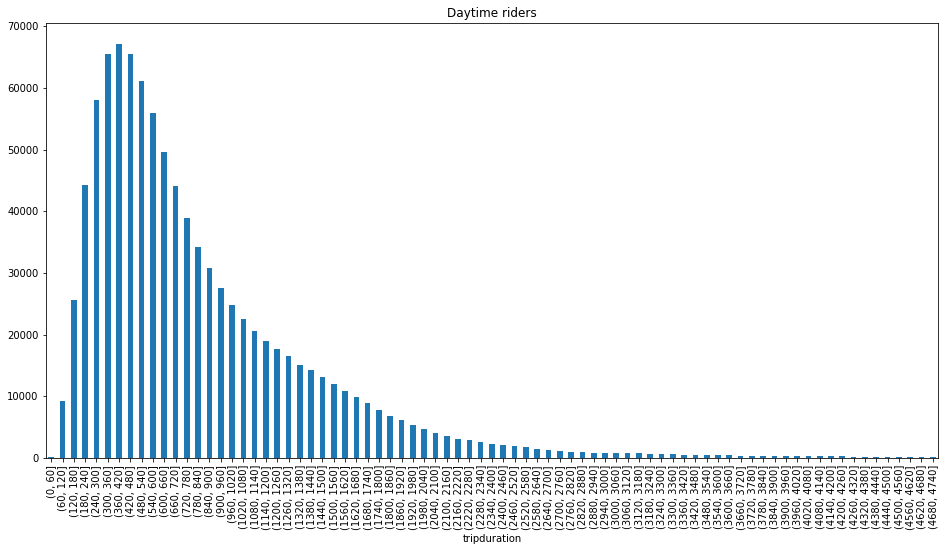

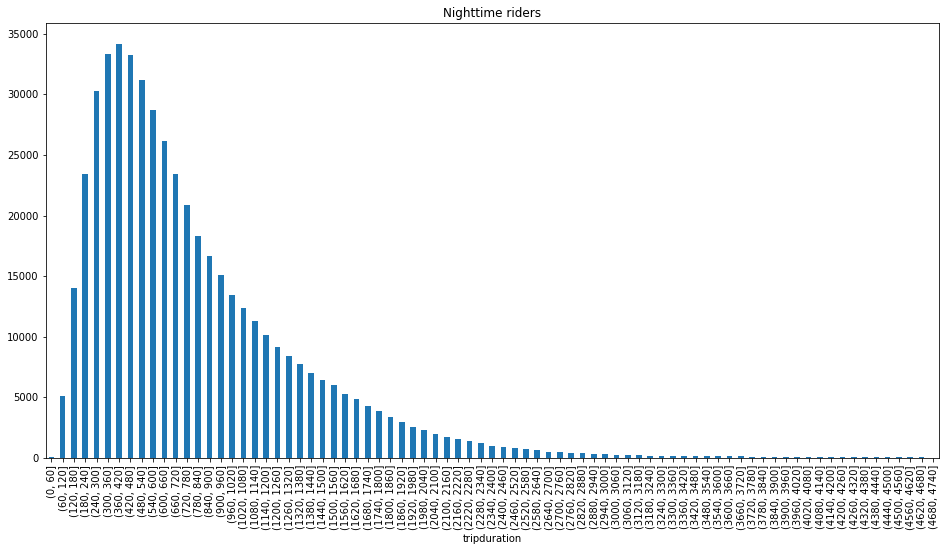

In [19]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(0, 4800, 60)
axday = df.day.groupby(pd.cut(df.tripduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False,figsize = (16,8))
axday.set_title("Daytime riders")
axnight = (~df.day).groupby(pd.cut(df.tripduration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False,figsize = (16,8))
axnight.set_title("Nighttime riders");


## Figure 1: histogrammed distribution of riders' tripduration by daytime and nighttime.

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

              count_nonzero
tripduration               
(0, 60]        3.047573e-07
(60, 120]      7.414316e-04
(120, 180]     2.293080e-03
(180, 240]     3.434595e-03
(240, 300]     4.019091e-03
(300, 360]     3.145985e-03
(360, 420]     2.161985e-03
(420, 480]     1.050195e-03
(480, 540]     3.354847e-04
(540, 600]     4.870976e-05
(600, 660]     1.115186e-03
(660, 720]     2.517993e-03
(720, 780]     4.030269e-03
(780, 840]     5.350782e-03
(840, 900]     6.871643e-03
(900, 960]     8.517525e-03
(960, 1020]    9.672443e-03
(1020, 1080]   1.113067e-02
(1080, 1140]   1.241330e-02
(1140, 1200]   1.323647e-02
(1200, 1260]   1.333049e-02
(1260, 1320]   1.312753e-02
(1320, 1380]   1.318777e-02
(1380, 1440]   1.245326e-02
(1440, 1500]   1.163079e-02
(1500, 1560]   1.136151e-02
(1560, 1620]   1.067677e-02
(1620, 1680]   1.015183e-02
(1680, 1740]   9.509380e-03
(1740, 1800]   9.261033e-03
...                     ...
(2940, 3000]   4.603932e-03
(3000, 3060]   4.408484e-03
(3060, 3120]   4.118

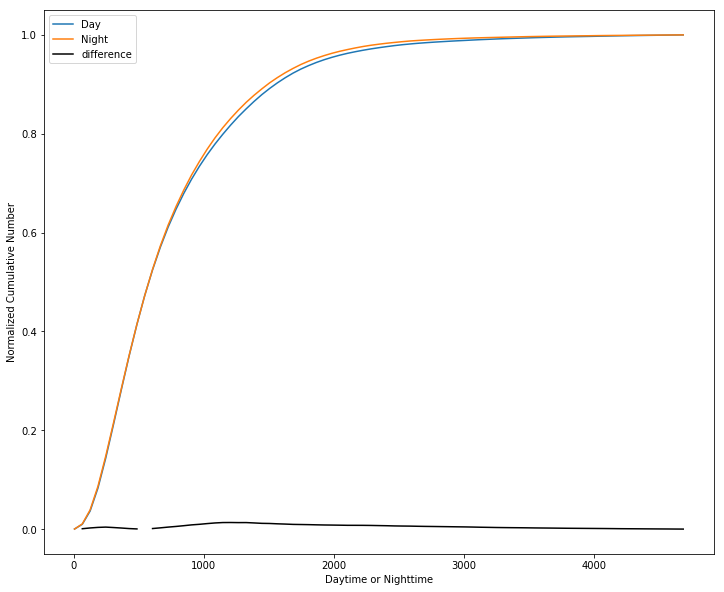

In [20]:
#print df.ageS, df.ageS.cumsum()

csday=df.day.groupby(pd.cut(df.tripduration, bins)).agg([count_nonzero]).cumsum()

csnight=(~df.day).groupby(pd.cut(df.tripduration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csday / csday.max()-csnight / csnight.max()))
pl.figure(figsize = (12,10))
pl.plot(bins[:-1] + 5, csday / csday.max(), label = "Day")
pl.plot(bins[:-1] + 5, csnight / csnight.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csnight / csnight.max() - csday / csday.max())**2, 'k-',
        label = "difference")
pl.xlabel("Daytime or Nighttime")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

## Figure 2: the cumulative distribution of CitiBike riders' tripduration by daytime and nighttime.  The difference of the riders' tripduration in daytime and nighttime is quite small.

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [21]:
daytrip=df[df.day].tripduration
nighttrip=df[~df.day].tripduration
ks = scipy.stats.ks_2samp(daytrip, nighttrip)
print (ks)

Ks_2sampResult(statistic=0.017437380568663396, pvalue=3.6154565924029599e-87)


**  FILL IN THE CELL BELOW!**

In [22]:
alpha=0.05
if ks[1] >= alpha: 
    print ("The Null hypothesis that the two samples are generated " + 
            "by the same parent distribution cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the two samples are generated " + 
            "by the same parent distribution is rejected (p<0.05)")


The Null hypothesis that the two samples are generated by the same parent distribution is rejected (p<0.05)


The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

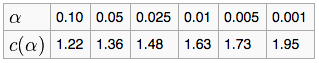

In [23]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="/nfshome/ml4922/PUI2018_ml4922/HW6_ml4922/photos/ks2sample_table.png")

In [24]:
n_1=len(daytrip)
n_2=len(nighttrip)
f = sqrt((n_1+n_2)/(n_1*n_2))
if ks[0] <= 1.73 * f: 
    print ("The Null hypothesis that the two samples are generated " + 
            "by the same parent distribution cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the two samples are generated " + 
            "by the same parent distribution is rejected (p<0.05)")

The Null hypothesis that the two samples are generated by the same parent distribution is rejected (p<0.05)


In [25]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
ks = scipy.stats.ks_2samp(daytrip[::500], nighttrip[::500])
print(ks)
if ks[1] >= alpha: 
    print ("The Null hypothesis that the two samples are generated " + 
            "by the same parent distribution cannot be rejected (p>=0.05)")
else: 
    print ("The Null hypothesis that the two samples are generated " + 
            "by the same parent distribution is rejected (p<0.05)")

Ks_2sampResult(statistic=0.050790278863262261, pvalue=0.065323942380428435)
The Null hypothesis that the two samples are generated by the same parent distribution cannot be rejected (p>=0.05)


# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [26]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

daytrip=np.random.choice(daytrip, 900000)
nighttrip=np.random.choice(nighttrip,900000)
p=scipy.stats.pearsonr(np.sort(daytrip), np.sort(nighttrip))
print('Pearson test result:',p )

Pearson test result: (0.93005230446554621, 0.0)


### Since p=0 < 0.05, we can reject null hypothesis that the two samples are generated from uncorrelated distributions. 

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [27]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
sp=scipy.stats.spearmanr(np.sort(daytrip), np.sort(nighttrip))
print('Spearman test result:',sp )

Spearman test result: SpearmanrResult(correlation=0.99999938741754957, pvalue=0.0)


### Since p=0 < 0.05, we can reject null hypothesis that the two samples are generated from uncorrelated distributions. 

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

# EC: age of bikers for trips originating in Manhattan and in Brooklyn 

In [28]:
manhattan=(40.7745457,-73.9718052)
brooklyn=(40.650002,-73.949997)

In [30]:
def borough(coor):
    lat,long = coor
    if lat>=manhattan[0] :
        return 'MH'
    elif lat<=brooklyn[0]: 
        return 'BK'
    if long<=manhattan[1]:
        return 'MH'
    elif long>=brooklyn[1]:
        return 'BK'